## Now You Code In Class: Tricks of The DataViz Masters

We will try something a bit different in the Activity - A series of Data Visualization coding challenges!

For this Now You Code, you will need:

    - OpenWeatherMap API key https://openweathermap.org/api (From previous HW)
    - Plotly Credentials  https://developers.zomato.com/api (From Lab) 
    

    


In [3]:
import requests
import geocoder
import matplotlib
import matplotlib.pyplot as plt
import chart_studio as plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import folium
from IPython.display import display

In [4]:
# SET YOUR KEYS AND CREDENTIALS
plotly.tools.set_credentials_file(username='mafudge73fc', api_key='NQdPRZUBnfSm8CHucHCD')
weather_key = '67f9d45c32dd086df27f2b7a90370a8e' # sign up for your own key at https://openweathermap.org/ 

In [5]:
def getWeather(weather_key,location):
    g = geocoder.osm(location)
    query_string = { 'lat' : g.latlng[0], 'lon': g.latlng[1], 'appid' : weather_key, 'units' : 'imperial'}
    url='https://api.openweathermap.org/data/2.5/onecall' 
    response = requests.get(url, params=query_string)
    response.raise_for_status()
    #print (response.url)
    weather = response.json()
    return weather


getWeather(weather_key, "Syracuse, ny")


{'lat': 43.0481,
 'lon': -76.1474,
 'timezone': 'America/New_York',
 'timezone_offset': -14400,
 'current': {'dt': 1620246613,
  'sunrise': 1620208354,
  'sunset': 1620259792,
  'temp': 49.89,
  'feels_like': 45.1,
  'pressure': 1009,
  'humidity': 76,
  'dew_point': 42.64,
  'uvi': 0.84,
  'clouds': 90,
  'visibility': 10000,
  'wind_speed': 12.66,
  'wind_deg': 290,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}]},
 'minutely': [{'dt': 1620246660, 'precipitation': 0},
  {'dt': 1620246720, 'precipitation': 0},
  {'dt': 1620246780, 'precipitation': 0},
  {'dt': 1620246840, 'precipitation': 0},
  {'dt': 1620246900, 'precipitation': 0},
  {'dt': 1620246960, 'precipitation': 0},
  {'dt': 1620247020, 'precipitation': 0},
  {'dt': 1620247080, 'precipitation': 0},
  {'dt': 1620247140, 'precipitation': 0},
  {'dt': 1620247200, 'precipitation': 0},
  {'dt': 1620247260, 'precipitation': 0},
  {'dt': 1620247320, 'precipitation': 0},
  {'d

# Exam Scores Data Set

Load the data

In [6]:
exam_df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/exam-scores/exam-scores.csv')
display(exam_df.sample(5))

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
14,M01,C,20,Y,Y,Y,26,86.70%,B+
36,M02,A,55,Y,Y,N,25,83.30%,B
11,M01,B,25,N,N,N,24,80.00%,B
50,M02,C,35,N,Y,N,23,76.70%,B-
58,M02,D,25,N,N,Y,23,76.70%,B-


## Challenge 1

Use `matplotlib` to plot a pie chart of 'Studied In Groups`

HINTS: 
 - You must get `value_counts` of the series, then make a `DataFrame` from it and plot.
 - Plotting help:  `help(df.plot.pie)` where `df` is the dataframe you made.


<AxesSubplot:ylabel='counts'>

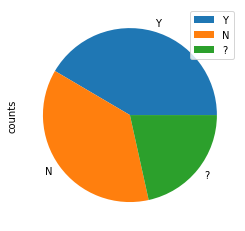

In [7]:
counts = exam_df['Studied_In_Groups'].value_counts()
df = pd.DataFrame( { "counts" : counts } )
df.plot.pie(y='counts')

## Challenge 2

Use `plotly` express to plot the same pie chart of 'Studied In Groups`

HINT: You can use the dataframe from the previous cell. `help(px.pie)` for assistance


<AxesSubplot:ylabel='counts'>

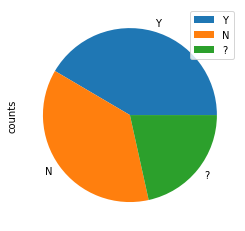

In [18]:
counts = exam_df['Studied_In_Groups'].value_counts()
df = pd.DataFrame( { "counts" : counts } )
df.plot.pie(y='counts')

In [19]:
px.pie(data_frame=df, values='counts', names=counts.index)

## Challenge 3

Use `matplotlib` to plot the grades Student_score as a bar. There should be a bar for each student score.

HINT: `help(exam_df.plot.bar)` for assistance.

<AxesSubplot:>

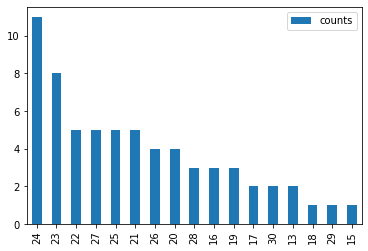

In [23]:
score  = exam_df['Student_Score'].value_counts()
df = pd.DataFrame( {"counts" : score })
df.plot.bar(y="counts")


In [26]:
px.bar(data_frame =df,y = 'counts', x = score.index )

In [33]:
from ipywidgets import interact
sections = ['M01', 'M02']
@interact(section=sections)
def showChart(section):
    filt = exam_df[ exam_df['Class_Section'] == section  ]
    scores = filt['Student_Score'].value_counts()
    df = pd.DataFrame({ 'scores' : scores})
    display(px.bar(data_frame=df, y = 'scores', x = scores.index))

interactive(children=(Dropdown(description='section', options=('M01', 'M02'), value='M01'), Output()), _dom_cl…

In [42]:
list(exam_df['Exam_Version'].unique())

array(['A', 'B', 'C', 'D'], dtype=object)

In [46]:
from ipywidgets import interact
from IPython.display import display, HTML
sections = ['M01', 'M02']
exam_versions = list(exam_df['Exam_Version'].unique())
display(HTML("<h2>Hi Mom!</h2>"))
@interact(section=sections,exam_version=exam_versions)
def showChart(section,exam_version):
    filt = exam_df[ exam_df['Class_Section'] == section  ]
    filt2 = filt[ filt['Exam_Version'] == exam_version ]
    scores = filt2['Student_Score'].value_counts()
    df = pd.DataFrame({ 'scores' : scores})
    display(HTML("This is a shart"))
    display(px.bar(data_frame=df, y = 'scores', x = scores.index))

interactive(children=(Dropdown(description='section', options=('M01', 'M02'), value='M01'), Dropdown(descripti…

## Challenge 4

Since the last plot was too detailed, use `matplotlib` to plot a histogram of the grades in 9 bins. 

HINT: `help(exam_df.hist)` for assistance.

In [29]:
exam_df

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
0,M01,A,20,N,N,Y,24,80.00%,B
1,M01,A,20,?,?,?,27,90.00%,A-
2,M01,A,30,Y,Y,Y,30,100.00%,A
3,M01,A,50,N,Y,Y,18,60.00%,C-
4,M01,A,55,Y,Y,N,24,80.00%,B
...,...,...,...,...,...,...,...,...,...
60,M02,D,40,?,?,?,23,76.70%,B-
61,M02,D,45,Y,Y,N,22,73.30%,C+
62,M02,D,45,?,?,?,24,80.00%,B
63,M02,D,55,Y,Y,N,24,80.00%,B


## Challenge 5

Plot the exact same histogram using plotly express. 

HINT: `help(px.histogram)` for assistance. 

Note (binning algorithm is different)


## Challenge 6

Plot a scatter comparing the completion time the exam to the exam score. use `matplotlib`

Note: No correlation will stick out.

## Challenge 7

Plot the same scatter in `plotly express`


# Weather API Dataset

Load the data 

In [ ]:
location = 'Syracuse, NY'
weather = getWeather(weather_key,location)
weather_df = pd.json_normalize(weather['daily'])
display(weather_df.sample(3))

## Challenge 7

Plot a line of daily day temperatures (temp.day) using `matplotlib`

## Challenge 8

Plot the same line in `plotly express`

## Challenge 9 

Let's plot multiple series

Using `matplotlib` plot two series `temp.min` and `temp.max` (both as lines) on the same graph.

HINT: 

 - This is not a one-liner. you must call in the `plt.plot()` method manually, then `display(plt)`
 - Consult the WMC1 example.

## Challenge 10

Plot the same thing using PoP (plain old plotly), similar to the lab example.

HINT: 

 - This is not a one-liner. you must make a figure and `add_trace()` for each series. 
 - Consult the lab. 

## Challenge 12

Create a `folium` map at the geographic center of NY State and place a pin there. The pin should day "This is the center"


HINT: 

 - Get the center here: https://en.wikipedia.org/wiki/List_of_geographic_centers_of_the_United_States
 - Use `folium.Marker` to make the pin, then add to map
 

# Cities of New York Dataset

Get it with this code

In [ ]:
cities_df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/ist256/13-visualization/ny-cities.csv')
cities_df.sample(5)

## Challenge 13

Create a `folium` map at the geographic center of NY State and place a pin there. put a red pin on the map for each city in the `cities_df` dataset.


HINT: 

 - Loop over each row in the data frame.
 - create the  `folium.Marker` then add to map
 

In [ ]:
# run this code to turn in your work!
from coursetools.submission import Submission
Submission().submit_now()